<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 147.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 154.4 MB/s eta 0:00:00


In [44]:
!pip install matplotlib
import plotly.express as px

import numpy as np

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [16]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-10 19:14:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  52.4MB/s    in 2.9s    

2025-07-10 19:15:02 (52.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



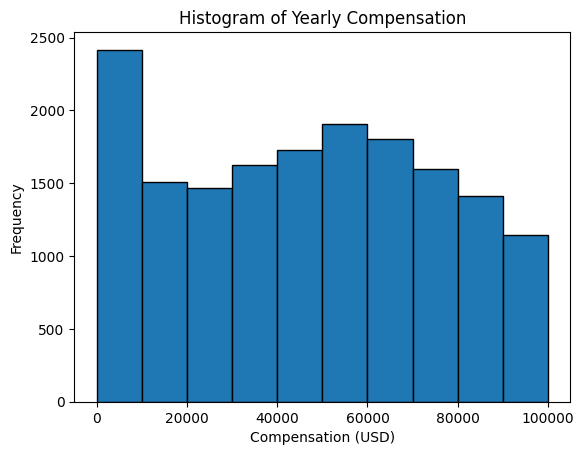

In [24]:
df_hist = df['ConvertedCompYearly'].dropna()

df_hist = df_hist[df_hist < 1e5]
df_hist.plot(kind='hist', bins=10,edgecolor='black')
plt.title('Histogram of Yearly Compensation')
plt.xlabel('Compensation (USD)')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



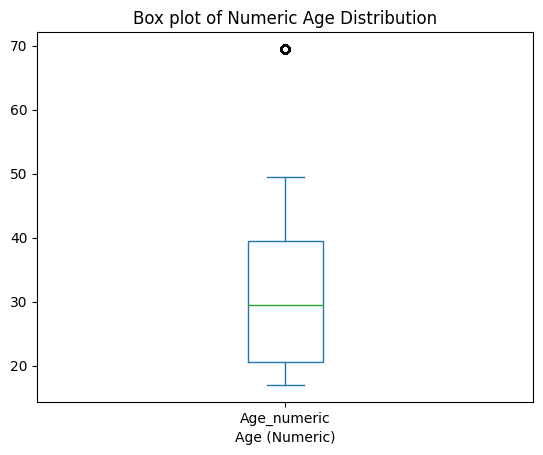

In [34]:
age_map = {'Under 18 years old': 17,
           '18-24 years old': 20.5,
           '25-34 years old': 29.5,
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '55-65 years old': 59.5,
           '65 years or older':69.5,
           'Prefer not to say': None
          }
           
df['Age_numeric'] = df['Age'].map(age_map)
df = df.dropna(subset=('Age_numeric'))

df['Age_numeric'].plot(kind='box')
plt.title('Box plot of Numeric Age Distribution')
plt.xlabel('Age (Numeric)')
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



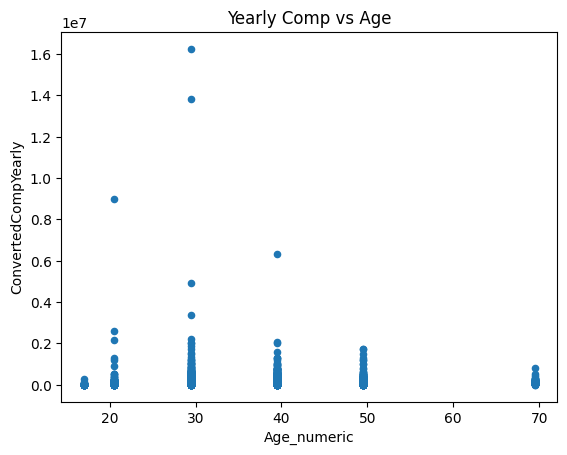

In [38]:
df = df.dropna(subset=('ConvertedCompYearly'))

df_scatter = df[['Age_numeric', 'ConvertedCompYearly']]
df_scatter.plot(kind='scatter', x='Age_numeric', y='ConvertedCompYearly')
plt.title('Yearly Comp vs Age')
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


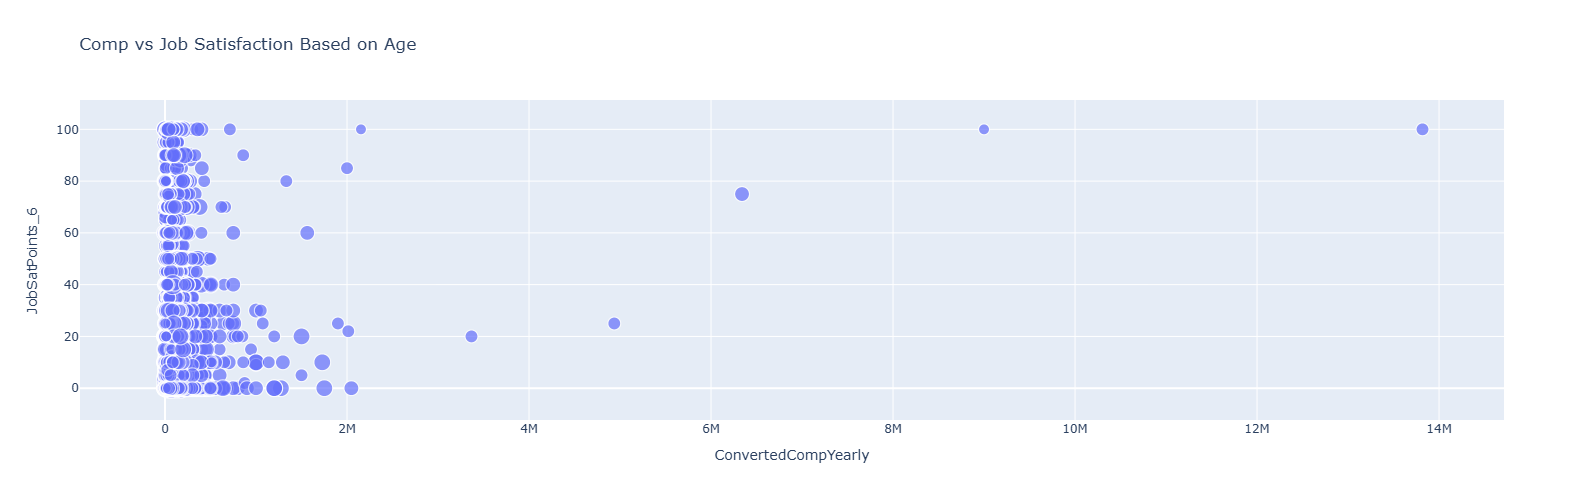

In [47]:
df_bubble = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']].dropna()

fig = px.scatter(df_bubble, x='ConvertedCompYearly', y='JobSatPoints_6', size='Age_numeric', title='Comp vs Job Satisfaction Based on Age', height= 500, width=900)
fig.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



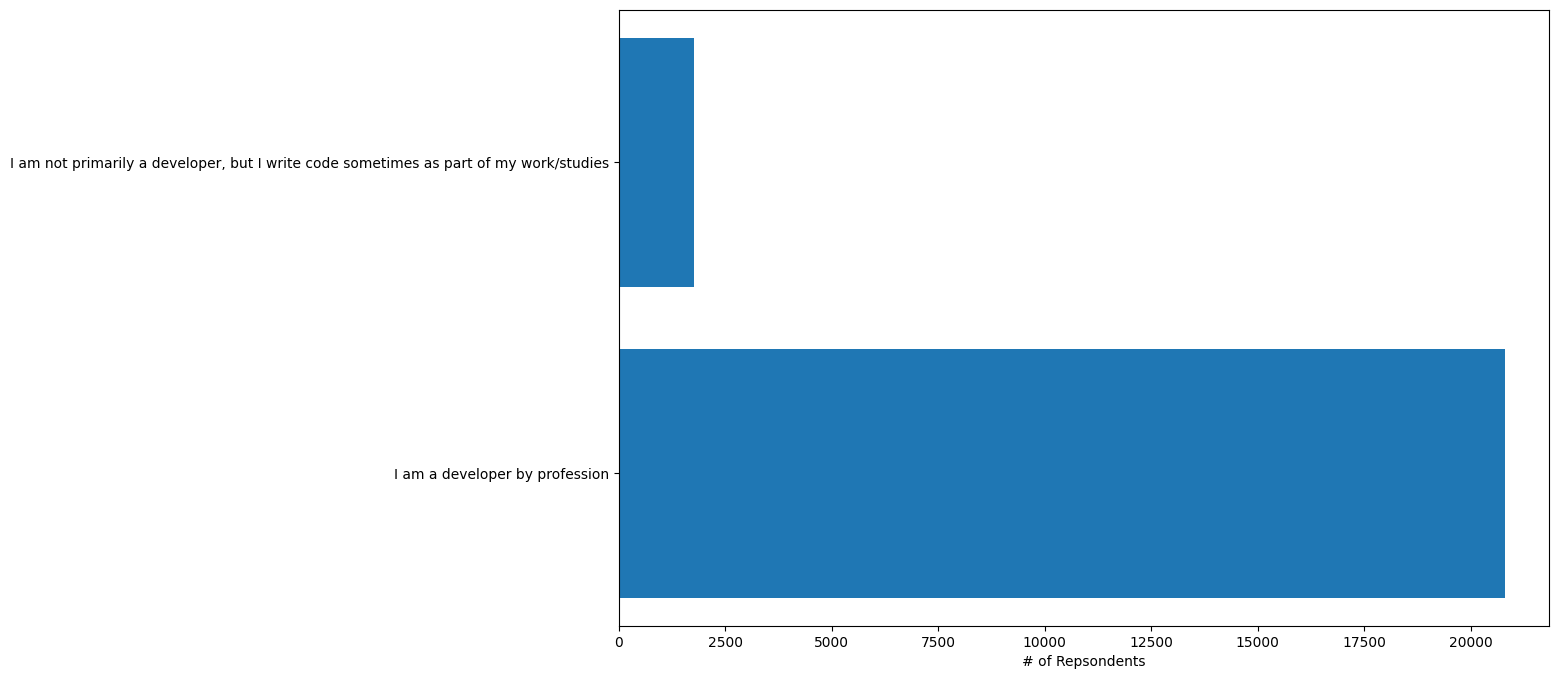

In [65]:
df_barh = df['MainBranch'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,8))
plt.barh(width=df_barh['count'], y=df_barh['MainBranch'])
plt.xlabel('# of Repsondents')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_300/2861379842.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   LanguageWantToWorkWith  count
36                 Python   9153
40                    SQL   8988
22             JavaScript   8934
44             TypeScript   8348
19               HTML/CSS   7732


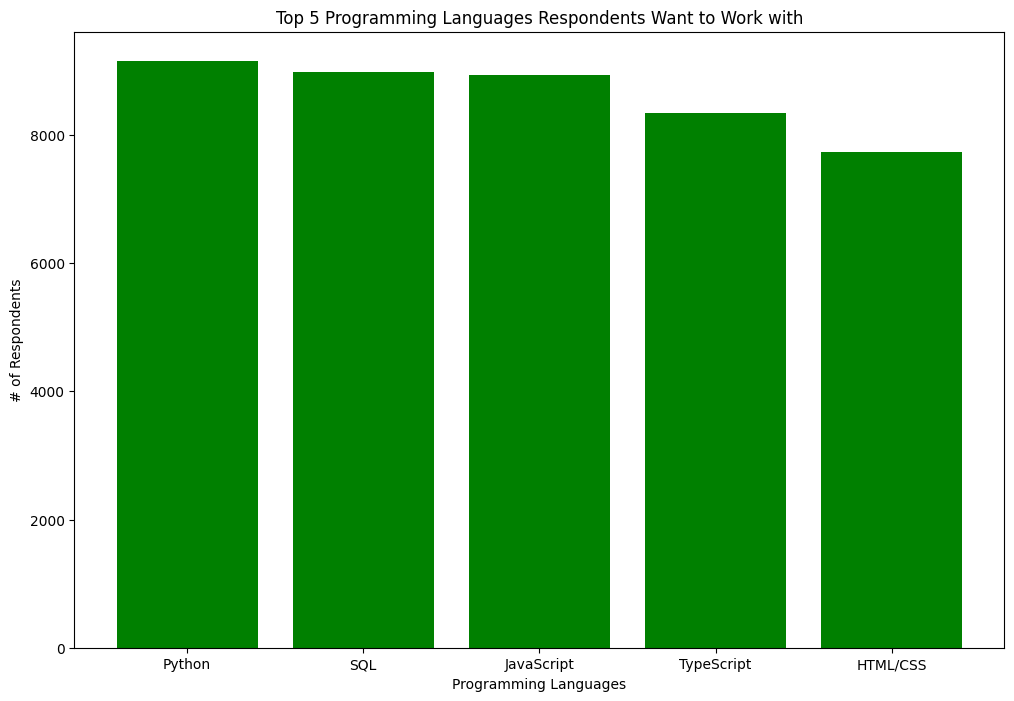

In [91]:
df_lang = df.dropna(subset=['LanguageWantToWorkWith'])
df_lang['LanguageWantToWorkWith'] = df_lang['LanguageWantToWorkWith'].str.split(';')
df_lang = df_lang.explode('LanguageWantToWorkWith')

df_lang = df_lang.groupby('LanguageWantToWorkWith').size().reset_index(name='count').sort_values(by='count', ascending=False).head()

plt.figure(figsize=(12,8))
plt.bar(x=df_lang['LanguageWantToWorkWith'], height=df_lang['count'], color = 'green')
plt.title('Top 5 Programming Languages Respondents Want to Work with')
plt.xlabel('Programming Languages')
plt.ylabel('# of Respondents')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


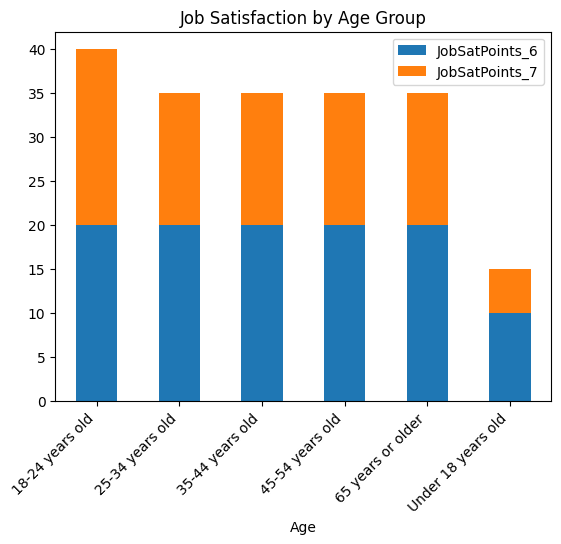

In [94]:
df_age = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

df_age.plot(kind='bar', stacked=True, title='Job Satisfaction by Age Group')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_300/1817978863.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



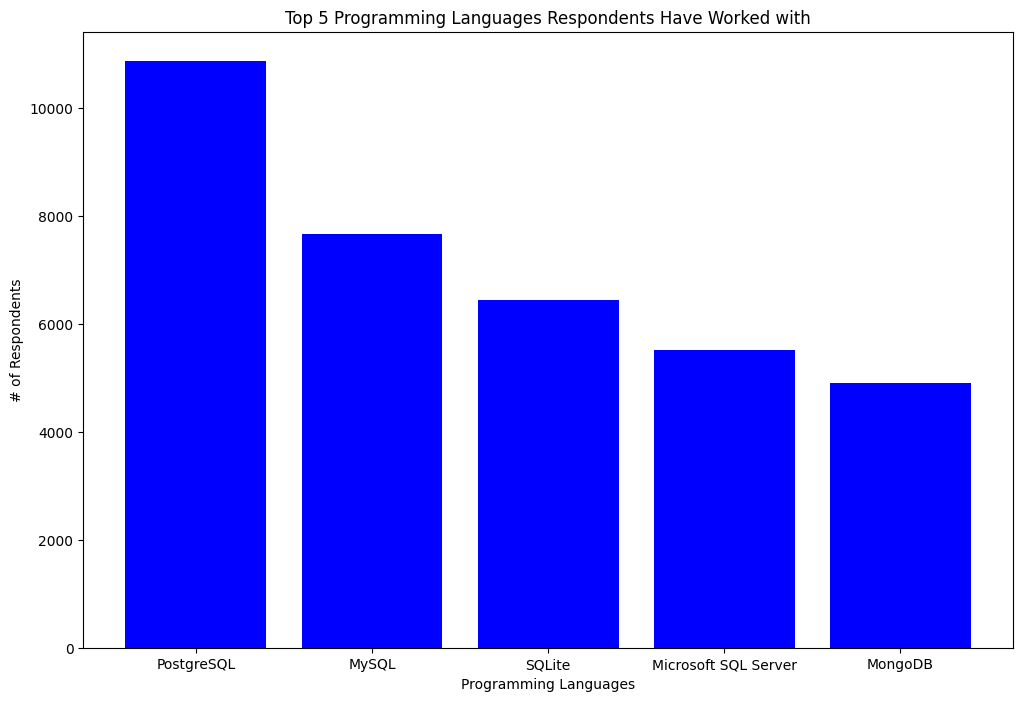

In [97]:
df_pop = df.dropna(subset=('DatabaseHaveWorkedWith'))
df_pop['DatabaseHaveWorkedWith'] = df_pop['DatabaseHaveWorkedWith'].str.split(';') 
df_pop = df_pop.explode('DatabaseHaveWorkedWith')

df_pop = df_pop.groupby('DatabaseHaveWorkedWith').size().reset_index(name='count').sort_values(by='count', ascending=False).head()

plt.figure(figsize=(12,8))
plt.bar(x=df_pop['DatabaseHaveWorkedWith'], height=df_pop['count'], color = 'blue')
plt.title('Top 5 Programming Languages Respondents Have Worked with')
plt.xlabel('Programming Languages')
plt.ylabel('# of Respondents')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_300/628437056.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



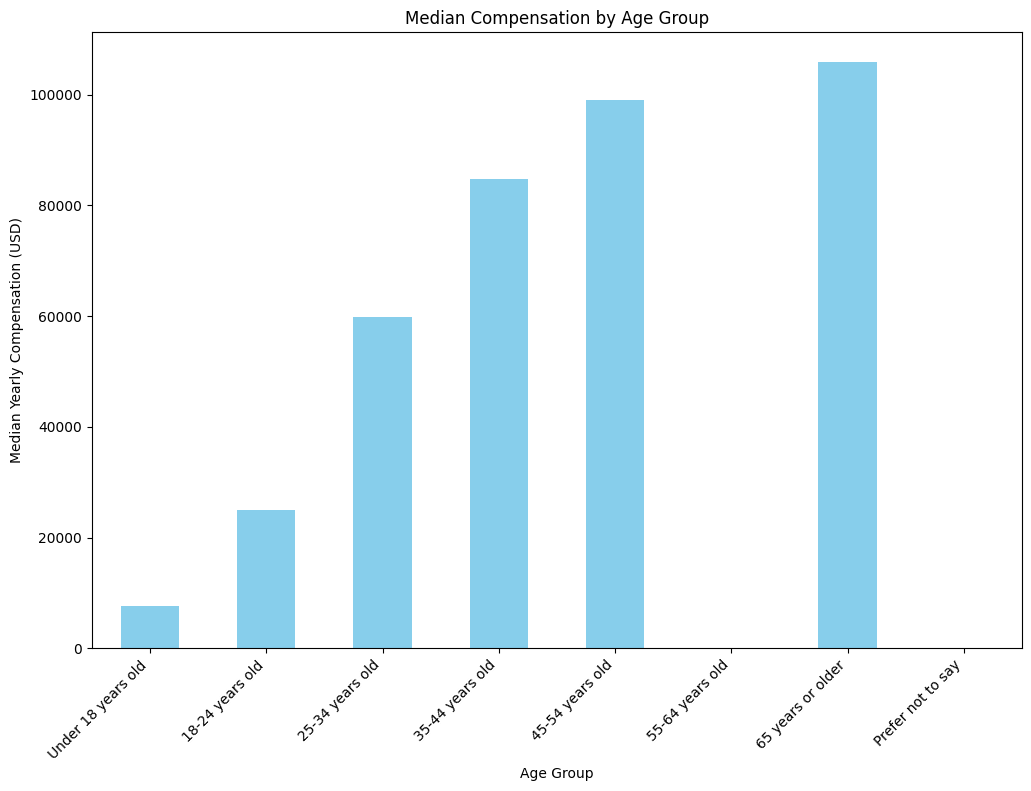

In [99]:
df_grouped = df[['Age', 'ConvertedCompYearly']].dropna()
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
df_grouped['Age'] = pd.Categorical(df_grouped['Age'], categories=age_order, ordered=True)
median = df_grouped.groupby('Age')['ConvertedCompYearly'].median()

median.plot(kind='bar', figsize=(12,8), color='skyblue')

plt.title('Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()



##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



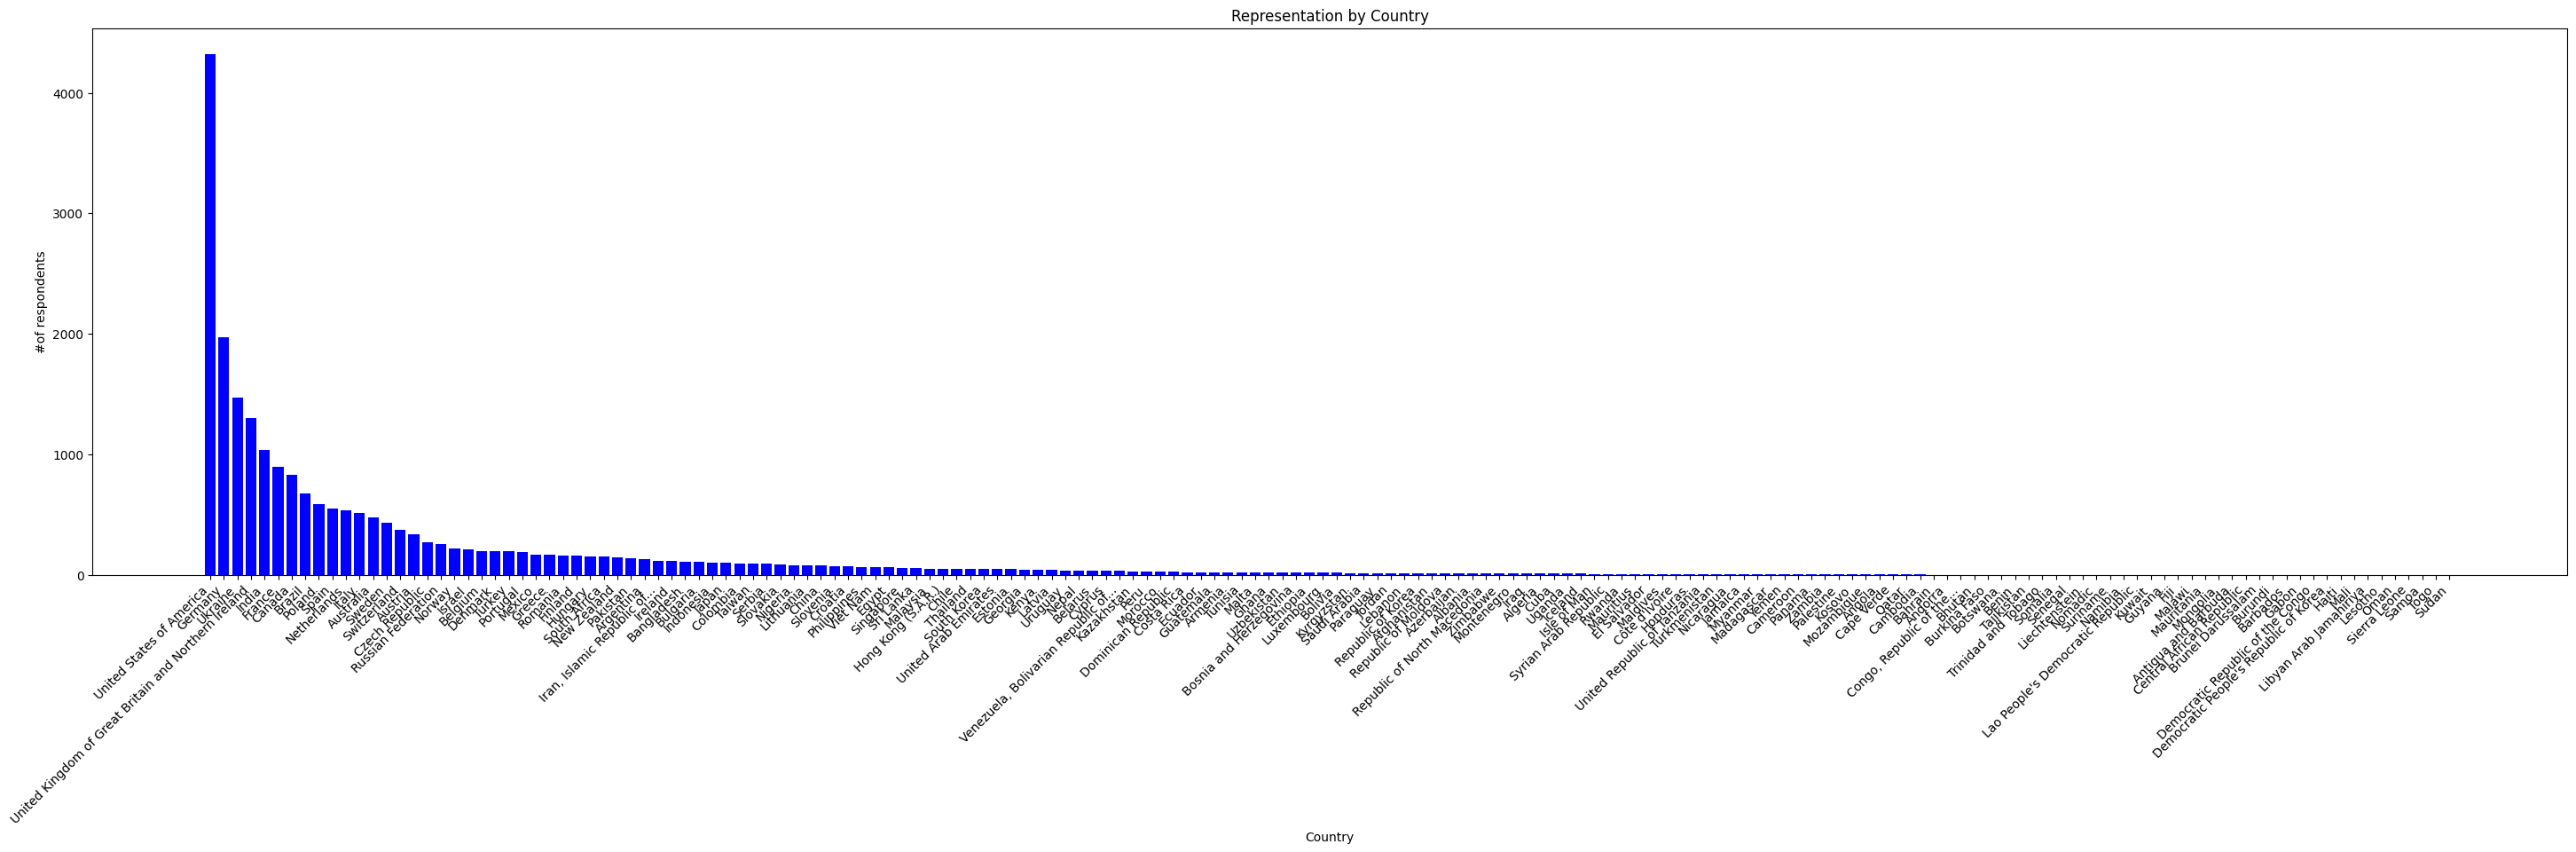

KeyError: 'count'

In [105]:
df_country = df[['Country']].dropna()

df_country = df_country.groupby('Country').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(36,8))

plt.bar(x=df_country['Country'], height=df_country['count'], color = 'blue')
plt.title('Representation by Country')
plt.xlabel('Country')
plt.ylabel('#of respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

df_country1 = df_country.groupby('Country').size().reset_index(name='count').sort_values(by='count').head()
plt.figure(figsize=(16,8))

plt.bar(x=df_country1['Country'], height=df_country1['count'], color = 'blue')
plt.title('Representation by Country')
plt.xlabel('Country')
plt.ylabel('#of respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
